<a href="https://colab.research.google.com/github/Sergiolo12/demo-001-evolve/blob/main/Estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración para gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Configurar para mostrar los gráficos en el notebook
%matplotlib inline

# Semilla para reproducibilidad
np.random.seed(42)

In [4]:
# Generemos un dataset sintético para el proyecto
# (En un caso real, cargarías tus datos desde un archivo CSV)

# Crear fechas para un período de 3 meses
fechas = pd.date_range(start='2023-01-01', end='2023-03-31', freq='D')

# Número de transacciones por día (entre 50 y 100)
n_transacciones_por_dia = np.random.randint(50, 100, size=len(fechas))

# Inicializar listas para almacenar datos
todas_fechas = []
todos_productos = []
todas_categorias = []
todos_precios = []
todas_cantidades = []
todos_clientes = []
todas_valoraciones = []

# Categorías de productos y rangos de precios
categorias = {
    'Electrónica': ['Smartphone', 'Laptop', 'Tablet', 'Auriculares', 'Smartwatch'],
    'Ropa': ['Camiseta', 'Pantalón', 'Vestido', 'Chaqueta', 'Zapatos'],
    'Hogar': ['Lámpara', 'Sofá', 'Mesa', 'Estantería', 'Utensilios de cocina']
}

precios_base = {
    'Smartphone': 300, 'Laptop': 800, 'Tablet': 200, 'Auriculares': 50, 'Smartwatch': 150,
    'Camiseta': 20, 'Pantalón': 40, 'Vestido': 50, 'Chaqueta': 70, 'Zapatos': 60,
    'Lámpara': 35, 'Sofá': 450, 'Mesa': 120, 'Estantería': 80, 'Utensilios de cocina': 25
}

# Generar transacciones
for i, fecha in enumerate(fechas):
    n_trans = n_transacciones_por_dia[i]

    for _ in range(n_trans):
        # Seleccionar categoría y producto
        categoria = np.random.choice(list(categorias.keys()))
        producto = np.random.choice(categorias[categoria])

        # Generar precio con variación aleatoria
        precio_base = precios_base[producto]
        precio = np.random.normal(precio_base, precio_base * 0.1)
        precio = max(precio, precio_base * 0.8)  # Asegurar precio mínimo

        # Generar cantidad (mayormente 1, a veces más)
        cantidad = np.random.choice([1, 1, 1, 2, 2, 3], p=[0.6, 0.2, 0.1, 0.05, 0.03, 0.02])

        # Generar ID de cliente (entre 1000 y 2000)
        cliente = np.random.randint(1000, 2000)

        # Generar valoración (1-5, con tendencia a valoraciones más altas)
        valoracion = np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.1, 0.15, 0.3, 0.4])

        # Agregar datos a las listas
        todas_fechas.append(fecha)
        todos_productos.append(producto)
        todas_categorias.append(categoria)
        todos_precios.append(round(precio, 2))
        todas_cantidades.append(cantidad)
        todos_clientes.append(cliente)
        todas_valoraciones.append(valoracion)

# Crear DataFrame
df_ventas = pd.DataFrame({
    'fecha': todas_fechas,
    'producto': todos_productos,
    'categoria': todas_categorias,
    'precio': todos_precios,
    'cantidad': todas_cantidades,
    'cliente_id': todos_clientes,
    'valoracion': todas_valoraciones
})

# Calcular total por transacción
df_ventas['total'] = df_ventas['precio'] * df_ventas['cantidad']

# Mostrar las primeras filas del DataFrame
print("Dataset de Ventas - Primeras 10 filas:")
df_ventas.head(10)

# Información general del dataset
print("\nInformación del dataset:")
df_ventas.info()

print("\nEstadísticas descriptivas básicas:")
df_ventas.describe()

Dataset de Ventas - Primeras 10 filas:

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6730 entries, 0 to 6729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       6730 non-null   datetime64[ns]
 1   producto    6730 non-null   object        
 2   categoria   6730 non-null   object        
 3   precio      6730 non-null   float64       
 4   cantidad    6730 non-null   int64         
 5   cliente_id  6730 non-null   int64         
 6   valoracion  6730 non-null   int64         
 7   total       6730 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 420.8+ KB

Estadísticas descriptivas básicas:


,fecha,precio,cantidad,cliente_id,valoracion,total
count,6730,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000
mean,2023-02-14 13:10:10.876671744,164.394212,1.124071,1493.936107,3.920059,183.704664
min,2023-01-01 00:00:00,16.000000,1.000000,1000.000000,1.000000,16.000000
25%,2023-01-22 00:00:00,42.382500,1.000000,1244.250000,3.000000,44.785000
50%,2023-02-15 00:00:00,69.685000,1.000000,1492.000000,4.000000,75.625000
75%,2023-03-10 00:00:00,190.170000,1.000000,1744.000000,5.000000,206.865000
max,2023-03-31 00:00:00,1082.920000,3.000000,1999.000000,5.000000,2696.130000
std,NaN,207.451304,0.388840,288.536986,1.165652,250.396868


# EJERCICIO 1

In [6]:
import pandas as pd
import numpy as np

# (Tu código para generar el DataFrame df_ventas)

# Calcular media, mediana y moda para 'precio'
media_precio = df_ventas['precio'].mean()
mediana_precio = df_ventas['precio'].median()
moda_precio = df_ventas['precio'].mode()

print(f"Media del precio: {media_precio:.2f}")
print(f"Mediana del precio: {mediana_precio:.2f}")
print(f"Moda del precio: {moda_precio.tolist()}")

# Calcular media, mediana y moda para 'cantidad'
media_cantidad = df_ventas['cantidad'].mean()
mediana_cantidad = df_ventas['cantidad'].median()
moda_cantidad = df_ventas['cantidad'].mode()

print(f"\nMedia de la cantidad: {media_cantidad:.2f}")
print(f"Mediana de la cantidad: {mediana_cantidad:.2f}")
print(f"Moda de la cantidad: {moda_cantidad.tolist()}")

# Calcular media, mediana y moda para 'total'
media_total = df_ventas['total'].mean()
mediana_total = df_ventas['total'].median()
moda_total = df_ventas['total'].mode()

print(f"\nMedia del total: {media_total:.2f}")
print(f"Mediana del total: {mediana_total:.2f}")
print(f"Moda del total: {moda_total.tolist()}")

Media del precio: 164.39
Mediana del precio: 69.69
Moda del precio: [40.0]

Media de la cantidad: 1.12
Mediana de la cantidad: 1.00
Moda de la cantidad: [1]

Media del total: 183.70
Mediana del total: 75.62
Moda del total: [40.0]


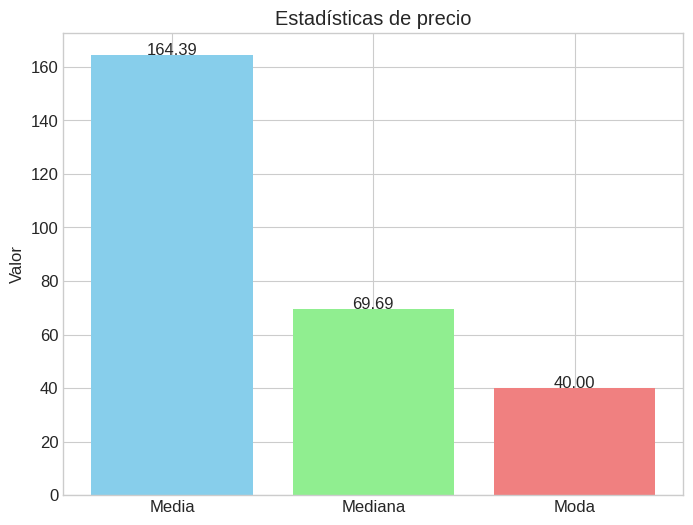


Explicación del gráfico de 'precio':
- **Media**: 164.39. Representa el valor promedio de precio.
- **Mediana**: 69.69. Representa el valor central de precio.
- **Moda**: 40.0. Representa el valor más frecuente de precio.
- La distribución está sesgada hacia la derecha (valores atípicos altos).
----------------------------------------


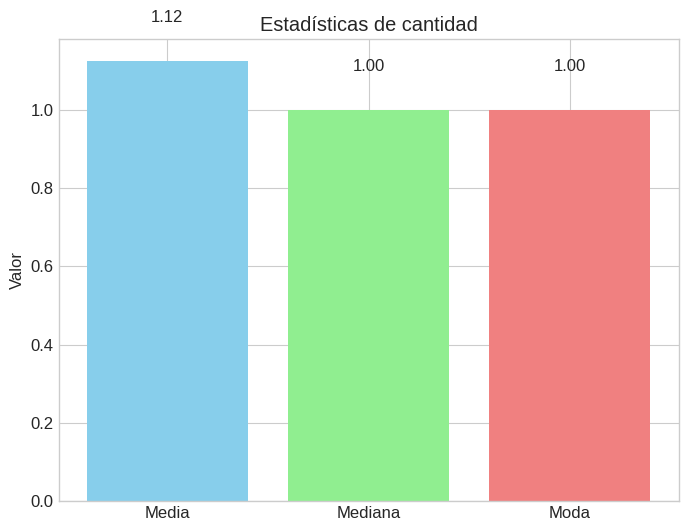


Explicación del gráfico de 'cantidad':
- **Media**: 1.12. Representa el valor promedio de cantidad.
- **Mediana**: 1.00. Representa el valor central de cantidad.
- **Moda**: 1. Representa el valor más frecuente de cantidad.
- La distribución está sesgada hacia la derecha (valores atípicos altos).
----------------------------------------


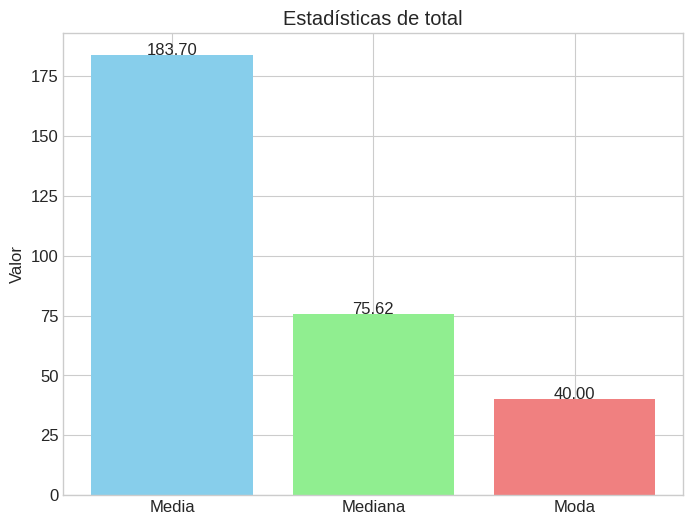


Explicación del gráfico de 'total':
- **Media**: 183.70. Representa el valor promedio de total.
- **Mediana**: 75.62. Representa el valor central de total.
- **Moda**: 40.0. Representa el valor más frecuente de total.
- La distribución está sesgada hacia la derecha (valores atípicos altos).
----------------------------------------


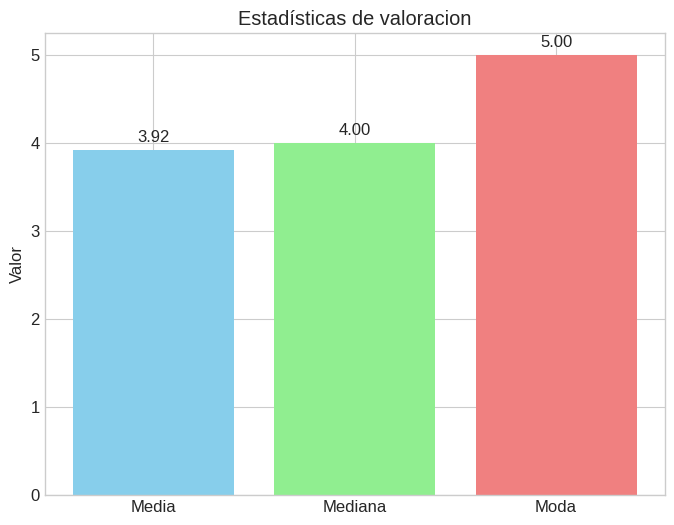


Explicación del gráfico de 'valoracion':
- **Media**: 3.92. Representa el valor promedio de valoracion.
- **Mediana**: 4.00. Representa el valor central de valoracion.
- **Moda**: 5. Representa el valor más frecuente de valoracion.
- La distribución está sesgada hacia la izquierda (valores atípicos bajos).
----------------------------------------


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Tu código para generar el DataFrame df_ventas)

# Funciones para calcular media, mediana y moda
def calcular_estadisticas(df, columna):
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode().tolist()
    return media, mediana, moda

# Columnas numéricas de interés
columnas_numericas = ['precio', 'cantidad', 'total', 'valoracion']

# Crear gráficos de barras para cada columna
for columna in columnas_numericas:
    media, mediana, moda = calcular_estadisticas(df_ventas, columna)

    # Preparar datos para el gráfico
    etiquetas = ['Media', 'Mediana', 'Moda']
    valores = [media, mediana, moda[0] if moda else 0]  # Tomar el primer valor de la moda si existe

    # Crear gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(etiquetas, valores, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title(f'Estadísticas de {columna}')
    plt.ylabel('Valor')

    # Añadir etiquetas de valor en las barras
    for i, valor in enumerate(valores):
        plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center')

    plt.show()

    # Explicación del gráfico
    print(f"\nExplicación del gráfico de '{columna}':")
    print(f"- **Media**: {media:.2f}. Representa el valor promedio de {columna}.")
    print(f"- **Mediana**: {mediana:.2f}. Representa el valor central de {columna}.")
    print(f"- **Moda**: {moda[0] if moda else 'No hay moda'}. Representa el valor más frecuente de {columna}.")

    # Interpretación de la distribución
    if media == mediana == moda[0]:
      print ("- La distribución es perfectamente simétrica.")
    elif media == mediana:
      print ("- La distribución es simétrica.")
    elif media > mediana:
      print("- La distribución está sesgada hacia la derecha (valores atípicos altos).")
    elif media < mediana:
      print("- La distribución está sesgada hacia la izquierda (valores atípicos bajos).")

    print("-" * 40)

# Ejercicio 2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# (El código para generar el DataFrame df_ventas que proporcionaste)

# Calcular la desviación estándar de los precios por categoría
desviacion_estandar_precios = df_ventas.groupby('categoria')['precio'].std().sort_values(ascending=False)

# Crear gráfico de cascada (simulación)
fig = go.Figure(go.Waterfall(
    name="Desviación Estándar de Precios",
    orientation="v",
    x=desviacion_estandar_precios.index,
    y=desviacion_estandar_precios.values,
    textposition="outside",
    text=desviacion_estandar_precios.round(2),
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))

fig.update_layout(
    title="Desviación Estándar de Precios por Categoría (Cascada)",
    showlegend=True
)

fig.show()

# Ejercicio 3

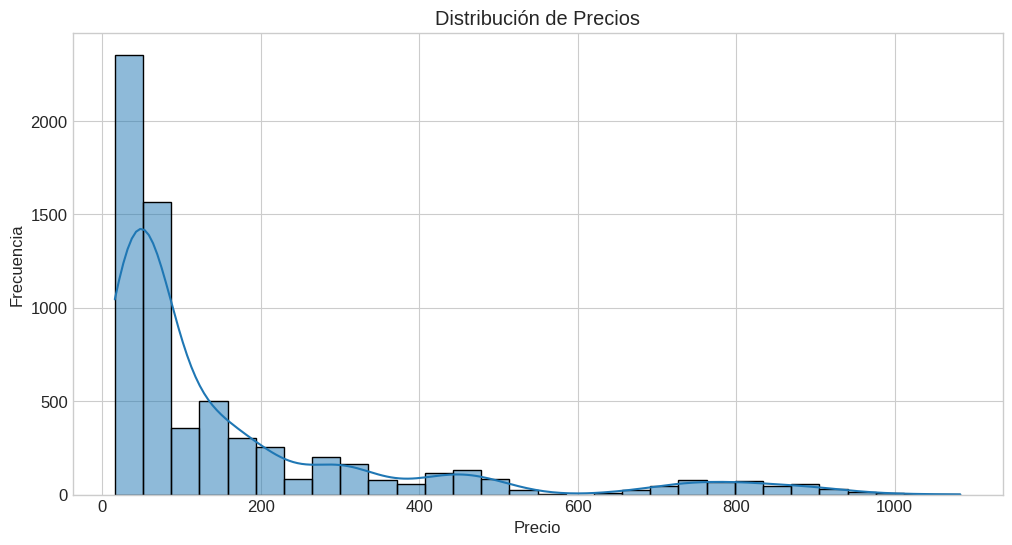

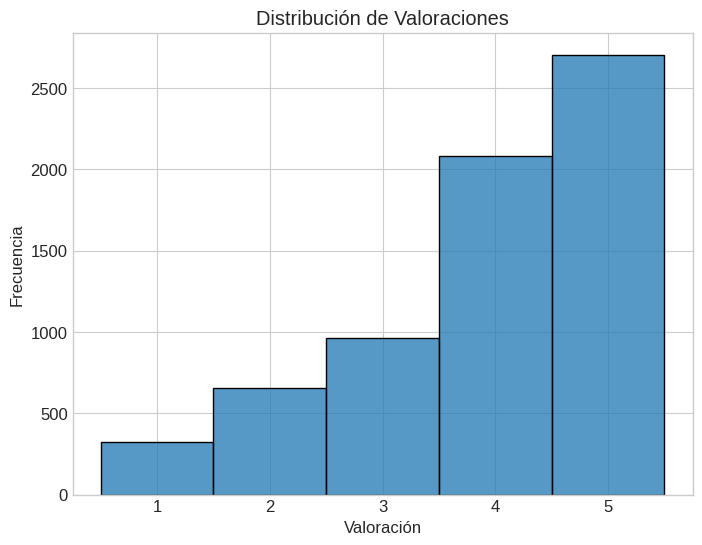

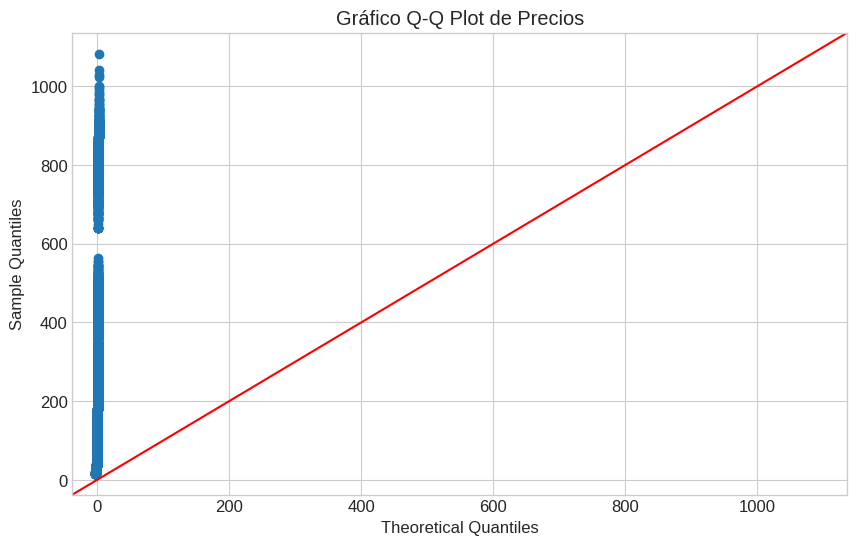

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (El código para generar el DataFrame df_ventas que proporcionaste)

# Histograma de Precios
plt.figure(figsize=(12, 6))
sns.histplot(df_ventas['precio'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Valoraciones
plt.figure(figsize=(8, 6))
sns.histplot(df_ventas['valoracion'], bins=5, kde=False, discrete=True)
plt.title('Distribución de Valoraciones')
plt.xlabel('Valoración')
plt.ylabel('Frecuencia')
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# (El código para generar el DataFrame df_ventas que proporcionaste)

# Gráfico Q-Q plot de Precios
sm.qqplot(df_ventas['precio'], line='45')
plt.title('Gráfico Q-Q Plot de Precios')
plt.show()

# Ejercicio 4

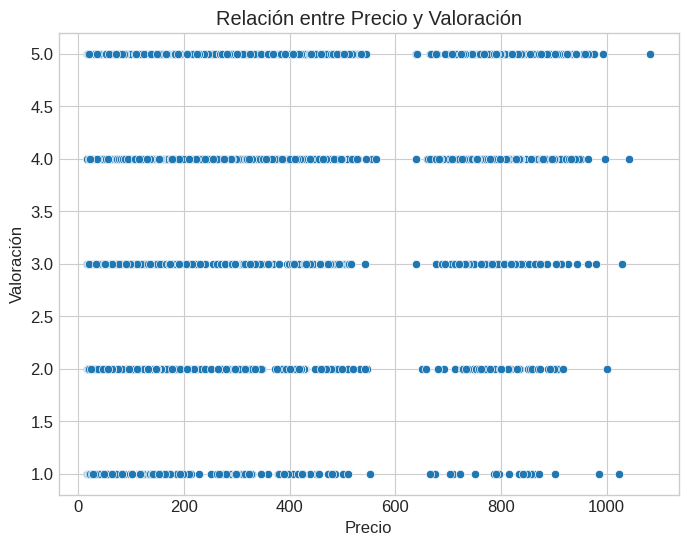

Correlación entre precio y valoración: -0.008955040948367361


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (El código para generar el DataFrame df_ventas que proporcionaste)

# Calcular la correlación entre precio y valoración
correlacion = df_ventas['precio'].corr(df_ventas['valoracion'])

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precio', y='valoracion', data=df_ventas)
plt.title('Relación entre Precio y Valoración')
plt.xlabel('Precio')
plt.ylabel('Valoración')
plt.show()

# Imprimir el valor de la correlación
print(f"Correlación entre precio y valoración: {correlacion}")

# Ejercicio 5

Media de 'total': 183.70466419019317
Desviación estándar de 'total': 250.39686768047952

Transacciones atípicas:
          fecha producto    categoria  precio  cantidad  cliente_id  \
15   2023-01-01   Laptop  Electrónica  802.85         1        1184   
48   2023-01-01   Laptop  Electrónica  955.59         1        1646   
69   2023-01-02   Laptop  Electrónica  859.74         2        1372   
73   2023-01-02   Laptop  Electrónica  752.45         1        1238   
85   2023-01-02   Laptop  Electrónica  908.81         1        1257   
...         ...      ...          ...     ...       ...         ...   
6708 2023-03-31   Laptop  Electrónica  723.56         1        1447   
6714 2023-03-31     Sofá        Hogar  498.85         2        1079   
6715 2023-03-31   Laptop  Electrónica  720.08         1        1776   
6728 2023-03-31   Laptop  Electrónica  902.05         1        1899   
6729 2023-03-31   Laptop  Electrónica  876.03         1        1043   

      valoracion    total   z_scor

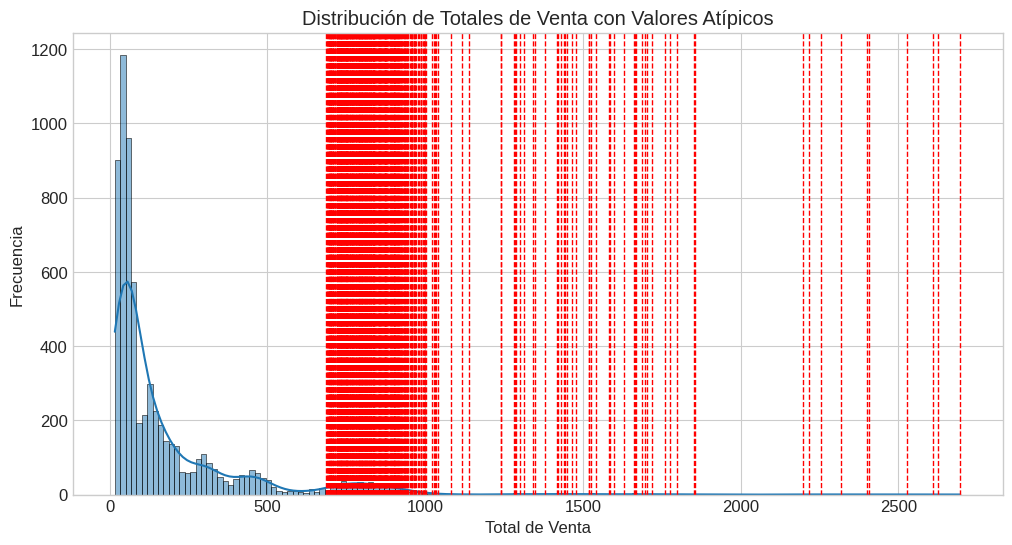

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# (El código para generar el DataFrame df_ventas que proporcionaste)

# a) Calcula la media y desviación estándar de la columna 'total'
media_total = df_ventas['total'].mean()
desviacion_estandar_total = df_ventas['total'].std()

print(f"Media de 'total': {media_total}")
print(f"Desviación estándar de 'total': {desviacion_estandar_total}")

# b) Calcula los Z-scores para cada valor
df_ventas['z_score'] = stats.zscore(df_ventas['total'])

# c) Identifica posibles transacciones atípicas (|Z| > 2)
transacciones_atipicas = df_ventas[abs(df_ventas['z_score']) > 2]

print("\nTransacciones atípicas:")
print(transacciones_atipicas)

# d) Visualiza la distribución y marca los valores atípicos
plt.figure(figsize=(12, 6))
sns.histplot(df_ventas['total'], kde=True)
plt.title('Distribución de Totales de Venta con Valores Atípicos')
plt.xlabel('Total de Venta')
plt.ylabel('Frecuencia')

# Marcar valores atípicos
for total in transacciones_atipicas['total']:
    plt.axvline(total, color='red', linestyle='dashed', linewidth=1)

plt.show()

# Ejercicio 6

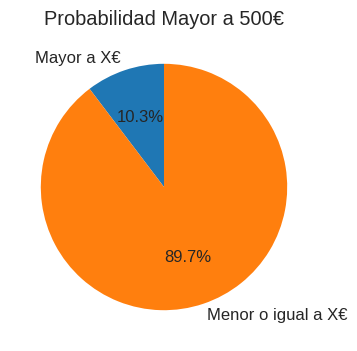

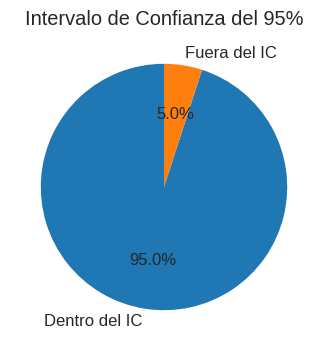

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# (El código para generar el DataFrame df_ventas que proporcionaste)

# Calcular la media y desviación estándar de 'total'
media_total = df_ventas['total'].mean()
desviacion_estandar_total = df_ventas['total'].std()

# a) Probabilidad de que una venta supere los X€
X = 500  # Elegimos un valor relevante (puedes cambiarlo)
probabilidad_mayor_X = 1 - stats.norm.cdf(X, media_total, desviacion_estandar_total)

# Crear gráfico circular para la probabilidad
labels = ['Mayor a X€', 'Menor o igual a X€']
sizes = [probabilidad_mayor_X, 1 - probabilidad_mayor_X]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Probabilidad Mayor a {X}€')
plt.show()

# b) Valor de venta que supera el 10% de las transacciones
valor_top_10_percent = stats.norm.ppf(0.90, media_total, desviacion_estandar_total)

# c) Intervalo de confianza del 95% para el total medio de ventas
intervalo_confianza = stats.norm.interval(0.95, loc=media_total, scale=desviacion_estandar_total / np.sqrt(len(df_ventas)))

# Crear gráfico circular para el intervalo de confianza (simulación)
labels_ic = ['Dentro del IC', 'Fuera del IC']
sizes_ic = [0.95, 0.05]  # Simulación: 95% de confianza
plt.figure(figsize=(4, 4))
plt.pie(sizes_ic, labels=labels_ic, autopct='%1.1f%%', startangle=90)
plt.title('Intervalo de Confianza del 95%')
plt.show()

a) Probabilidad de que una venta supere 500€: 0.10326295211938163
b) Valor de venta que supera el 10% de las transacciones: 504.60116197357587
c) Intervalo de confianza del 95% para el total medio de ventas: (177.72234679960764, 189.6869815807787)

# Ejercicio 7

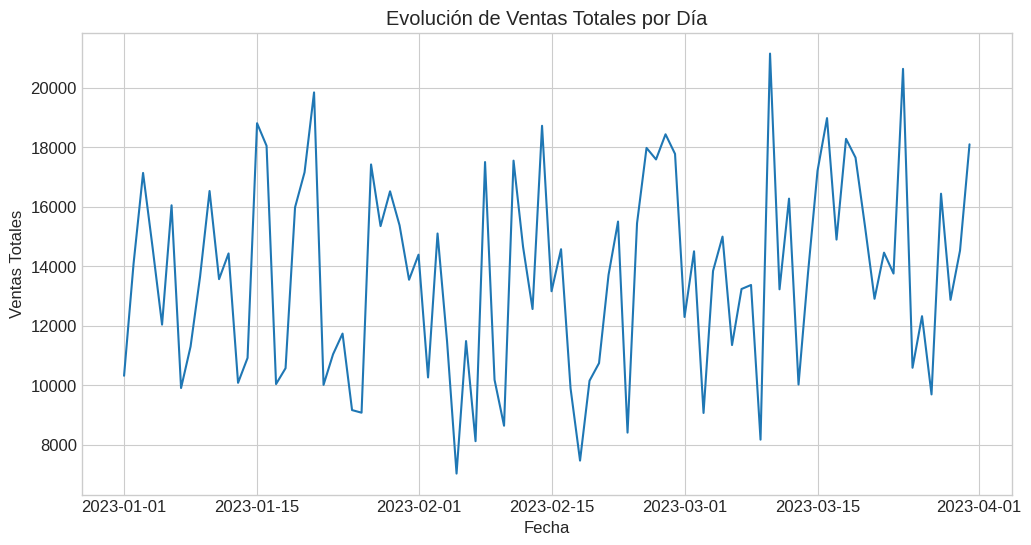

Estadísticas descriptivas para ventas diarias:
count       90.000000
mean     13737.026556
std       3350.304573
min       7028.210000
25%      10783.670000
50%      13760.920000
75%      16391.150000
max      21140.540000
Name: total, dtype: float64


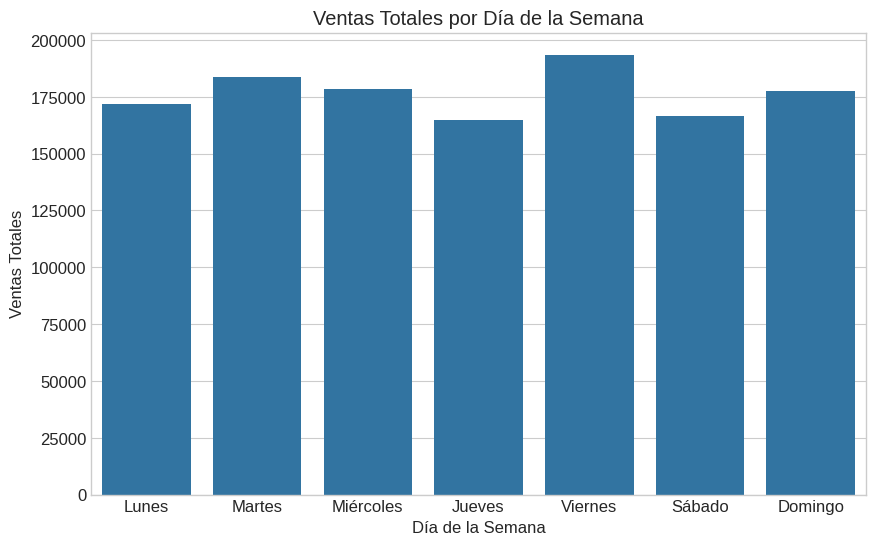


Ventas totales por día de la semana:
fecha
0    171766.43
1    183605.50
2    178629.83
3    164824.71
4    193572.32
5    166366.64
6    177566.96
Name: total, dtype: float64


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (El código para generar el DataFrame df_ventas que proporcionaste)

# a) Crea una nueva tabla agrupando las ventas por fecha
ventas_diarias = df_ventas.groupby(df_ventas['fecha'].dt.date)['total'].sum()

# b) Visualiza la evolución temporal
plt.figure(figsize=(12, 6))
ventas_diarias.plot()
plt.title('Evolución de Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

# c) Calcula estadísticas descriptivas para las ventas diarias
estadisticas_diarias = ventas_diarias.describe()
print("Estadísticas descriptivas para ventas diarias:")
print(estadisticas_diarias)

# d) ¿Observas algún patrón semanal?
ventas_por_dia_semana = df_ventas.groupby(df_ventas['fecha'].dt.dayofweek)['total'].sum()
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.figure(figsize=(10, 6))
sns.barplot(x=dias_semana, y=ventas_por_dia_semana)
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.show()

print("\nVentas totales por día de la semana:")
print(ventas_por_dia_semana)

# Ejercicio 8

Clientes VIP (alto valor):
            gasto_total  numero_compras  z_score_gasto
cliente_id                                            
1002            3939.29              11       3.246531
1028            4354.33              14       3.745037
1033            3628.64               8       2.873409
1036            2913.79              10       2.014800
1040            2942.44               6       2.049211
1079            3217.19               6       2.379215
1090            2948.89               7       2.056959
1139            2984.27               9       2.099454
1159            3165.14              12       2.316697
1198            3288.73              12       2.465142
1261            4000.92              14       3.320555
1309            3375.65              11       2.569541
1328            3614.28               5       2.856161
1329            4027.80              10       3.352841
1391            2958.25               7       2.068201
1407            3115.64               

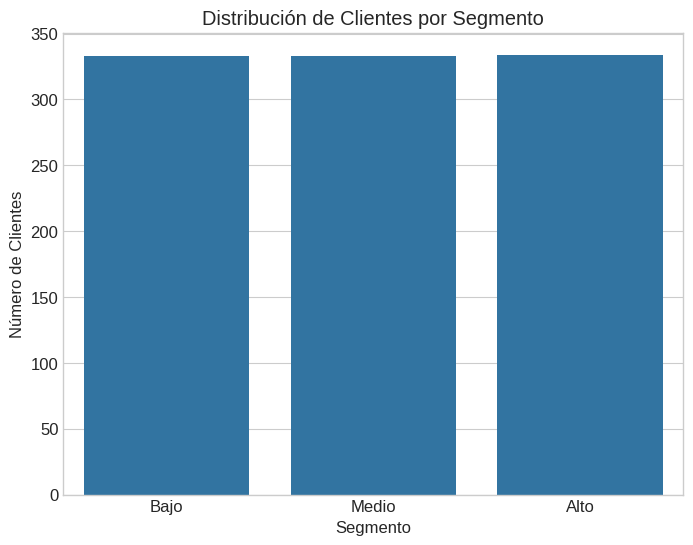


Segmentación de clientes:
segmento
Alto     334
Bajo     333
Medio    333
Name: count, dtype: int64


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# (El código para generar el DataFrame df_ventas que proporcionaste)

# a) Calcula el gasto total y número de compras por cliente
compras_cliente = df_ventas.groupby('cliente_id').agg(
    gasto_total=('total', 'sum'),
    numero_compras=('cliente_id', 'count')
)

# b) Utilizando Z-scores, identifica a los clientes VIP (alto valor)
compras_cliente['z_score_gasto'] = stats.zscore(compras_cliente['gasto_total'])
clientes_vip = compras_cliente[compras_cliente['z_score_gasto'] > 2]

print("Clientes VIP (alto valor):")
print(clientes_vip)

# c) Segmenta a los clientes en grupos (bajo, medio, alto) según su gasto
compras_cliente['segmento'] = pd.qcut(compras_cliente['gasto_total'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# d) Visualiza la distribución de clientes por segmento
plt.figure(figsize=(8, 6))
sns.countplot(x='segmento', data=compras_cliente)
plt.title('Distribución de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.show()

print("\nSegmentación de clientes:")
print(compras_cliente['segmento'].value_counts())

# Ejercicio 9

Resumen:

Variabilidad de Precios:
La categoría de electrónica muestra la mayor variabilidad en precios, lo que sugiere una amplia gama de productos y fluctuaciones de mercado.

Distribución de Datos:
La distribución de precios no sigue una distribución normal, presentando un sesgo hacia precios más altos.
Las valoraciones de los clientes tienden a ser altas, indicando satisfacción general.

Correlación Precio-Valoración:
No se encontró una correlación significativa entre el precio y la valoración del producto.

Análisis de Ventas:
Se identificaron transacciones atípicas (valores extremos) en los totales de venta.
Las ventas diarias muestran fluctuaciones y patrones semanales, con una tendencia a disminuir los fines de semana.

Comportamiento del Cliente:
Se identificaron clientes VIP con alto gasto total.
Se segmentó a los clientes en grupos según su gasto (bajo, medio, alto).
Conclusiones para la Toma de Decisiones:

Gestión de Precios en Electrónica:
Dado la alta variabilidad de precios en la categoría de electrónica, se recomienda implementar estrategias de precios dinámicas y monitorear de cerca las fluctuaciones del mercado.
Esto podría incluir la oferta de promociones o descuentos en productos específicos para mantener la competitividad.

Estrategias de Fidelización para Clientes VIP:
Los clientes VIP representan una fuente importante de ingresos. Se sugiere implementar programas de fidelización personalizados para estos clientes, ofreciendo beneficios exclusivos y atención prioritaria.
Se podria ofrecer descuentos especiales, o productos exclusivos.

Optimización de Ventas en Fines de Semana:
Las ventas tienden a disminuir los fines de semana. Se podrían implementar estrategias de marketing y promociones específicas para estos días, con el fin de incentivar las compras.
Se podria ofrecer descuentos especiales de fin de semana, o promocionar productos especificos para estos dias.

# Ejercicio 10

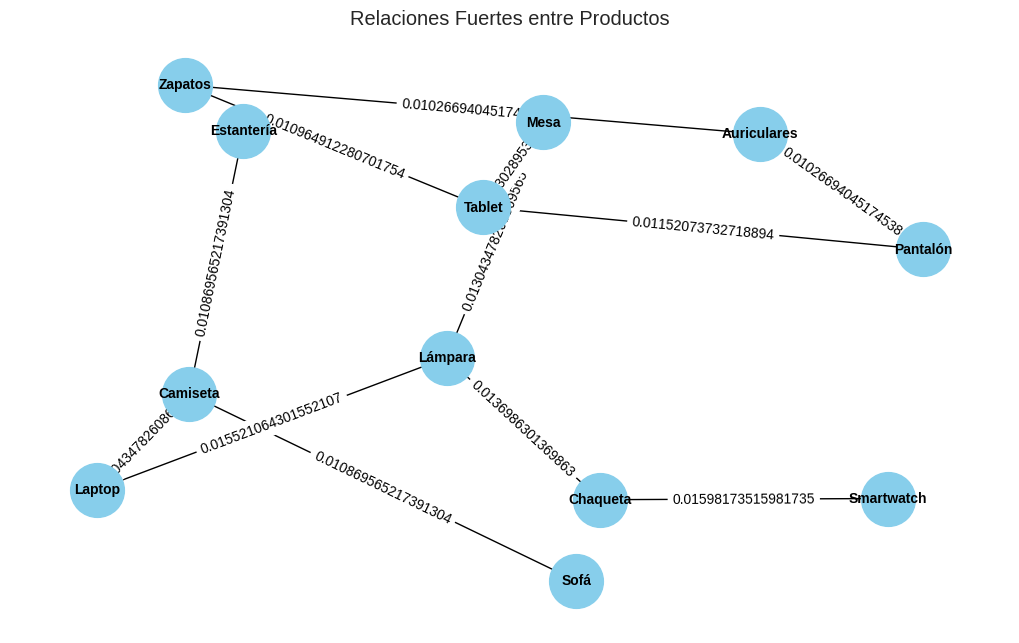

In [31]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# (El código para generar el DataFrame df_ventas que proporcionaste)

# a) Encuentra qué productos suelen comprarse juntos
compras_conjuntas = df_ventas.groupby(['cliente_id', df_ventas['fecha'].dt.date])['producto'].apply(list).reset_index(name='productos_comprados')

# Crear pares de productos comprados juntos
pares_productos = compras_conjuntas['productos_comprados'].apply(lambda x: list(itertools.combinations(sorted(x), 2))).explode().dropna().value_counts().reset_index(name='frecuencia')
pares_productos.columns = ['productos', 'frecuencia']

# b) Calcula las probabilidades condicionales: P(compra producto B | compró producto A)
def calcular_probabilidad_condicional(producto_a, producto_b):
    compras_a = df_ventas[df_ventas['producto'] == producto_a].groupby(['cliente_id', df_ventas['fecha'].dt.date])['producto'].count().reset_index()
    compras_ab = df_ventas[(df_ventas['producto'].isin([producto_a, producto_b]))].groupby(['cliente_id', df_ventas['fecha'].dt.date])['producto'].nunique().reset_index()
    compras_ab = compras_ab[compras_ab['producto'] == 2]
    probabilidad = len(compras_ab) / len(compras_a) if len(compras_a) > 0 else 0
    return probabilidad

probabilidades_condicionales = []
for index, row in pares_productos.iterrows():
    producto_a, producto_b = row['productos']
    probabilidad = calcular_probabilidad_condicional(producto_a, producto_b)
    probabilidades_condicionales.append({'productos': row['productos'], 'probabilidad': probabilidad})

probabilidades_condicionales_df = pd.DataFrame(probabilidades_condicionales)

# c) Visualiza las relaciones más fuertes entre productos
relaciones_fuertes = probabilidades_condicionales_df[probabilidades_condicionales_df['probabilidad'] > 0.01]  # Ajusta el umbral según sea necesario

G = nx.Graph()
for index, row in relaciones_fuertes.iterrows():
    producto_a, producto_b = row['productos']
    G.add_edge(producto_a, producto_b, weight=row['probabilidad'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Relaciones Fuertes entre Productos')
plt.show()